# Medical Appointment Data Analysis

## Introduction
This dataset contains information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

## Question
1. Which gender is show up more often?
2. What factors are important to predict if patient will show up?

## Data Wrangling
#### Data Description
- PatientId: Patient Id
- AppointmentID: Appointment Id
- Gender: Sex
- ScheduledDay: day the patient set up appointment
- AppointmentDay: day the patient to show up
- Age: Age
- Neighbourhood: location of the hospital
- Scholarship: whether or not the patient is enrolled in Brasilian welfare program Bolsa Família (0 = No, 1 = Yes)
- Hipertension: have hypertension (0 = No, 1 = Yes)
- Diabetes: have diabetes (0 = No, 1 = Yes)
- Alcoholism: People's consumption of alcohol (0 = No, 1 = Yes)
- Handcap: handicap (0 = No, 1/2/3/4 = Yes)
- SMS_received: reminder about appointment to the patients (0 = No, 1 = Yes)
- No-show: indicates wheter patient will show up or not? No if the patient showed up, and Yes if they did not (0 = Yes, 1 = No)

In [75]:
# Using python 3 environment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from datetime import datetime
import seaborn as sns
%matplotlib inline

# Set style for all graphs
sns.set_style('whitegrid')

# Read Medical Appointment Data, md stand for Medicaldata
md = pd.read_csv('noshowappointments.csv')

In [76]:
# Print the last few records to review data, so we can comparet last record to total record
md.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [77]:
# Create total record
len(md)

110527

In [78]:
# to set up data so I can use it for analysis
#rename No-show column to No_Show
md.rename(columns={'No-show' : 'No_Show'}, inplace = True)

#group the age
def age_group(x):
    if x < 10:
        return 'Children'
    elif x < 20:
        return 'Teen'
    elif x < 45:
        return 'Adult'
    elif x < 60:
        return 'Middle Age'
    else:
        return 'Elder'
    
md['Age_Group'] = md['Age'].apply(age_group)

In [79]:
# Convert No_Show and set up the date
md['No_Show'] = md['No_Show'].str.replace('No', '1')
md['No_Show'] = md['No_Show'].str.replace('Yes', '0')
md['No_Show'] = md['No_Show'].astype(int)

md['ScheduledDay'] = md['ScheduledDay'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ').date())
md['AppointmentDay'] = md['AppointmentDay'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ').date())

Total_appointment = len(md)
md.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_Show,Age_Group
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,Elder
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,Middle Age
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,Elder
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,Children
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,Middle Age


In [80]:
print("Number of Patients: %d" % len(md['PatientId'].unique()))
print ('Age:',sorted(md.Age.unique()))
print ('Gender:', md.Gender.unique())
print ('Neighbourhood', md.Neighbourhood.unique())
print ('Scholarship:', md.Scholarship.unique())
print ('Hipertension:', md.Hipertension.unique())
print ('Diabetes:', md.Diabetes.unique())
print ('Alcoholism:', md.Alcoholism.unique())
print ('Handcap:', md.Handcap.unique())
print ('SMS_received:', md.SMS_received.unique())
print ('No_Show:', md.No_Show.unique())

Number of Patients: 62299
Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Gender: ['F' 'M']
Neighbourhood ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANG

## Analysis
**1. Which gender is show up more often?**

In [81]:
#To show mean of patient based on gender

Female = (md["Gender"] == "F").mean()
Male = (md["Gender"] == "M").mean()
Total_Female = (md["Gender"] == "F").sum()
Total_Male = (md["Gender"] == "M").sum()
print ('Mean of Female patient: {}'.format(Female))
print ('Mean of Male patient: {}'.format(Male))
md['No_Show'].value_counts()

Mean of Female patient: 0.6499769287142508
Mean of Male patient: 0.35002307128574917


1    88208
0    22319
Name: No_Show, dtype: int64

Based on mean above. We know that female patients higher than male patients, but this is based on total appointment wheter they show up or not

        No_Show
Gender         
F         57246
M         30962


Text(0,0.5,'Patients Show up')

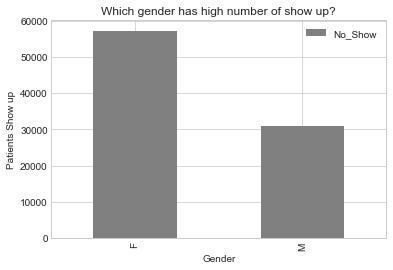

In [82]:
# Now lets check which gender is show up more often?
# Grouped Gender and No_Show to check which gender is show up more often?

Gender_visit = md[['Gender','No_Show', ]]
gender_grouped = Gender_visit.groupby(['Gender'])
total_group_gender = gender_grouped.sum()
print (total_group_gender)
total_group_gender.plot(kind = 'bar', color = 'Gray', title = 'Which gender has high number of show up?')
plt.ylabel('Patients Show up')

Based on the histogram above, we can see that female patients is show up more often than male patients, cause we have **more female patients than male patients**. What if I compare patients show up based on gender to total patient based on gender? I think it is more accurate to determine which gender has higher number of show up.

In [83]:
# Calculate percentage of patient will show up based on gender
# Divide total gender show up with total patient based on gender
print ('Percentage of Female patient show up: {}%'.format((57246/Total_Female)*100))
print ('Percentage of Male patient show up: {}%'.format((30962/Total_Male)*100))

Percentage of Female patient show up: 79.68541202672606%
Percentage of Male patient show up: 80.03205211052808%


So we have a result that Male patient has higher percentage than female patient, but I dont think gender as a important factor to predict if patient will show up or not since the different between female and male is not even 0.5%. **Regardless of which gender has higher number, it will show has high number of show up.**

**2. What factors are important to predict if patient will show up?**

In [84]:
# Create Category based on gender to see the patient with serious problem (Diabetes, Alcohol, Hypertension, Handicap),
# SMS reminder, and scholarship. Since they have same number (0 & 1), so it will easier to group it in one.
data_categorize = md.pivot_table(values=['Diabetes','Alcoholism','Hipertension','Handcap', 'SMS_received', 'Scholarship'],
                                 columns=['No_Show'],index=['Gender'],aggfunc=np.sum)

In [85]:
categorize = data_categorize.unstack().unstack('No_Show').reset_index().rename(columns={"level_0":"Category"})

In [86]:
# To see number of patient with serious problem and SMS reminder will show up or not (1 = Show up, 0 = No)
categorize['Total'] = categorize[0] + categorize[1]

In [87]:
categorize.groupby(['Gender','Category'])[0,1,'Total'].sum()

No_Show                 0      1  Total
Gender Category                        
F      Alcoholism     308    915   1223
       Diabetes      1017   4589   5606
       Handcap        271   1133   1404
       Hipertension  2657  12682  15339
       SMS_received  6720  17482  24202
       Scholarship   2106   6747   8853
M      Alcoholism     369   1768   2137
       Diabetes       413   1924   2337
       Handcap        182    873   1055
       Hipertension  1115   5347   6462
       SMS_received  3064   8216  11280
       Scholarship    472   1536   2008

Text(0,0.5,'Total Patient')

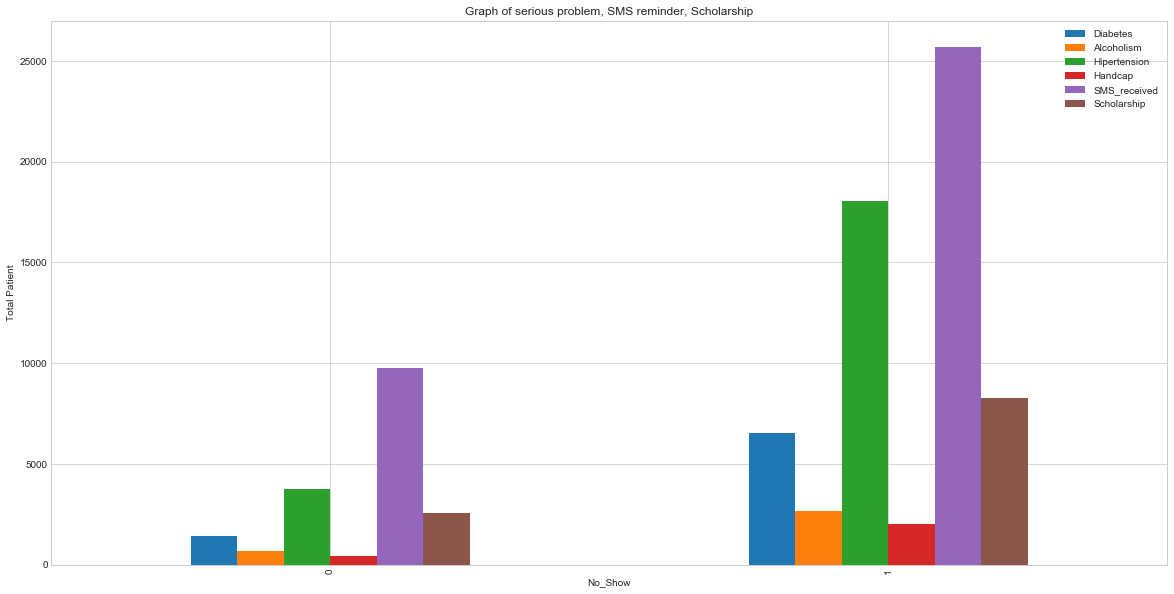

In [88]:
# To visualize data above in bar (0 = patient didn't show up, 1 = patient show up)
data = md[['No_Show','Diabetes','Alcoholism','Hipertension','Handcap', 'SMS_received', 'Scholarship']]
visual_data = data.groupby('No_Show').sum()
visual_data.plot(kind='bar', figsize=(20,10), title = 'Graph of serious problem, SMS reminder, Scholarship')
plt.ylabel('Total Patient')

Based on chart above. We know that if patient has serious problem or scholarship or get SMS, they will show up for medical appointment.
Since not all patient has serious problem or scholarship or get SMS, so I **compare the patient show up with serious problem or scholarship or get SMS to total patient has serious problem or scholarship or get SMS (wheter they show up or not)**. Not to total patient who show up, because not every patient has serious problem or scholarship or get SMS, which is not apple to apple if we compare all patient show up has serious problem or scholarship or get SMS to total patient who show up. In that chart, we can see if patient has serious problem or get SMS or scholarship, they will try to come.

Text(0,0.5,'Total Show up')

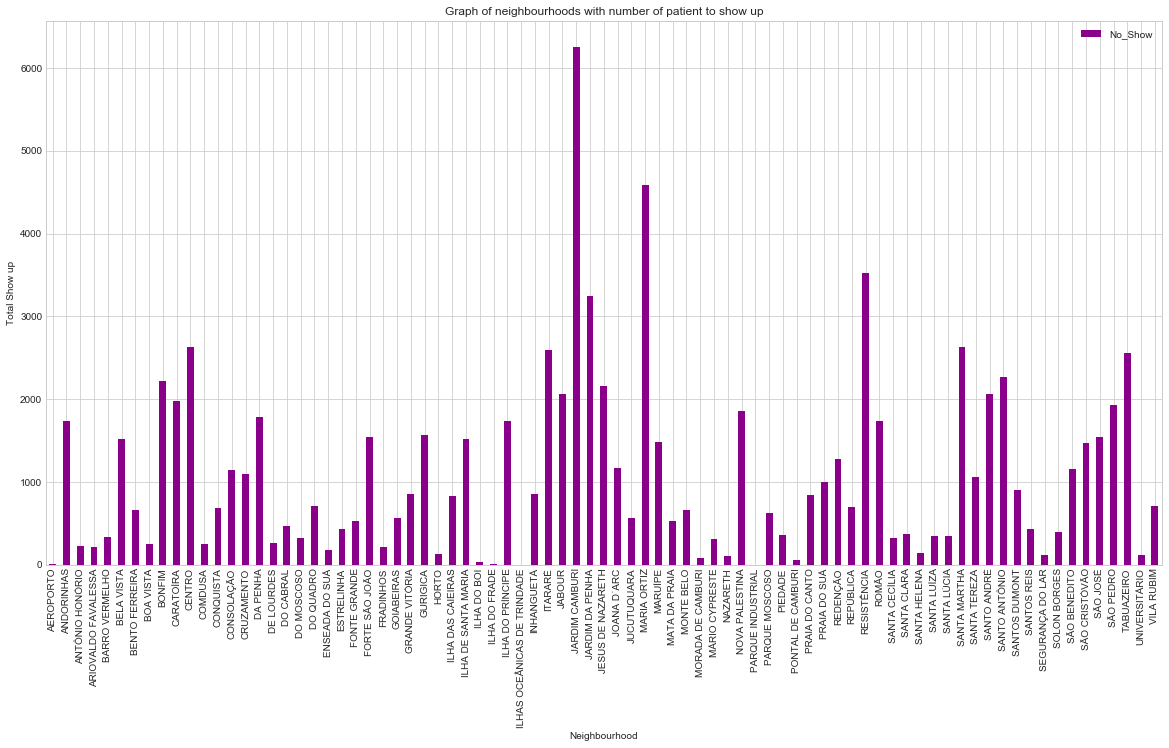

In [89]:
# To check what neighbourhood has the higher number of patient to show up
data = md[['Neighbourhood','No_Show']]
neighbourhood_md = data.groupby('Neighbourhood').sum()
neighbourhood_md.plot(kind='bar', color = 'darkmagenta', figsize = (20,10),
                     title = 'Graph of neighbourhoods with number of patient to show up')
plt.ylabel('Total Show up')

Based on bar above, we know that Jardim Camburi is the highest number of patient to show up. Neighbourhood could be one important factor to predict patient will show up.

            No_Show
Age_Group          
Adult         27535
Children      13992
Elder         17931
Middle Age    19071
Teen           9679


C:\Users\uruta\Anaconda3\envs\my_env\lib\site-packages\ipykernel\__main__.py:6: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


Text(0,0.5,'Total Show up')

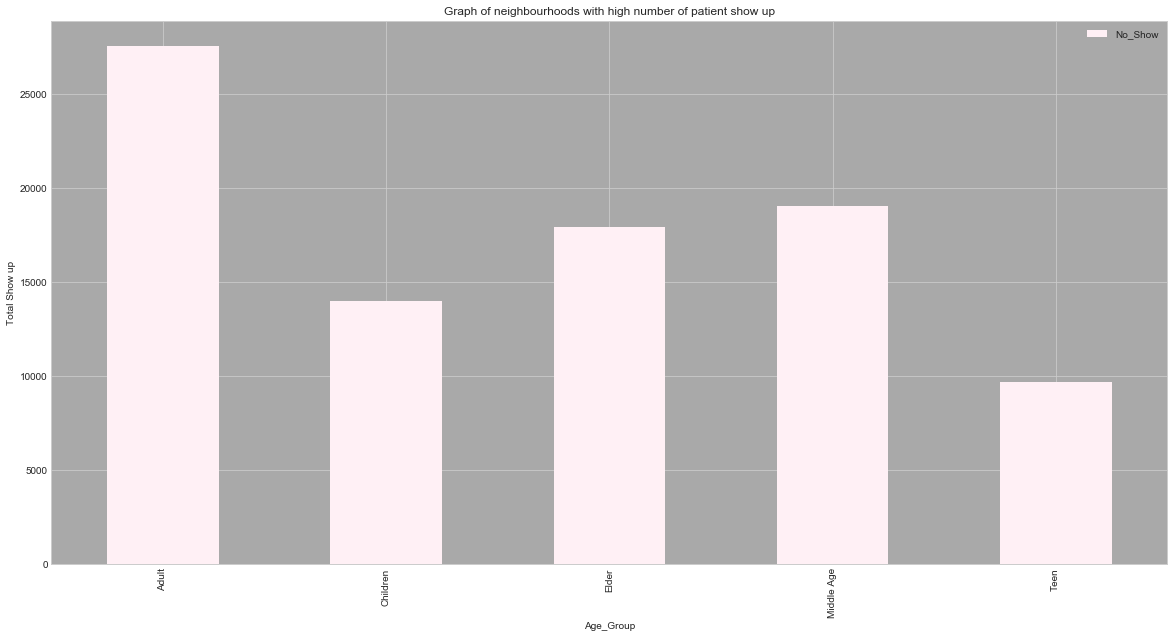

In [90]:
# to check what group age has higher number of show up
data = md[['Age_Group','No_Show']]
Agegr_md = data.groupby('Age_Group').sum()
print (Agegr_md)
(Agegr_md.plot(kind='bar', figsize = (20,10), color = 'lavenderblush', 
              title = 'Graph of neighbourhoods with high number of patient show up')).set_axis_bgcolor('darkgray')
plt.ylabel('Total Show up')

Based on bar above, we know that Adult is the highest number of patient to show up. Age could be one important factor to predict patient will show up, as we can see adult people (20 - 45) has the highest patient to show up. This factor might be caused by they have more energy to move and can come byself (without help other people) 

## Conclusion

**For question one Which gender is show up more often?**<br>
We already get the answer, if we see by total patient or total patient who show up, it shows us that Female is the higher. It because we have more female patient than male patient. But, if compare patients show up based on gender to total patient based on gender, we will get male as higher percentage. Since the different between female and male is not even 0.5%, I don't think gender can be important factor. Regardless of which gender has higher number, it will show has high number of show up.

**For question two What factors are important to predict if patient will show up?** <br>
I categorize: Hipertension, Diabetes, Alcoholism, and Handcaps as a serious problem. So if patient has one of them or more, I will say the patient has serious problem. <br>
First, I do testing to check how serious problem, scholarship, and SMS received can help patient to show up. Since not all patient has serious problem or scholarship or get SMS, so I **compare the patient show up with serious problem or scholarship or get SMS to total patient has serious problem or scholarship or get SMS (wheter they show up or not)**. Not to total patient who show up, because not every patient has serious problem or scholarship or get SMS, which is not apple to apple if we compare all patient show up has serious problem or scholarship or get SMS to total patient who show up. In that chart, we can see if patient has serious problem or get SMS or scholarship, they will try to come. Which I can say serious problem as a important factor to predict patient to show up. <br>
Then, I do testing in neighbourhoods to determine if the location can be important factor. I only do testing to the patient who show up, the result is Jardim Camburi as the location which has highest number of patient to show up. Neighbourhood could be one important factor to predict patient will show up. <br>
Then, I do testing in age based on group age. The group is: Children[less than 10], Teen[10 - 19], Adult[20 - 44], Middle Age[45 - 59] and Elder[more than 59].<br>
In chart, Adult is the highest number of patient to show up. Age could be one important factor to predict patient will show up, as we can see adult people (20 - 45) has the highest patient to show up. This factor might be caused by they have more energy to move and can come byself (without help other people). <br>
<br>
Now we can determine important factors to predict the patient to show up.<br>
I categorize serious problem, scholarship and SMS received as specific factor because not all patient has it. Gender, Age, and Neighbourhood as general factor because everyone has it.<br>
- As we can see before, gender is not important factor cause only have small different between male and female. So as long as which gender has higher number, it will show as higher number patient to show up. <br>
- While, another general factor such as age and neighbourhood can be important factor.<br>
- All of specific factor can be important factor to predict the patient will show up or not.

BUT, We have **limitation**. Such as: <br>
1. Distance from neighbourhood to the patient location, which can help to predict the patient.
2. Hour in AppointmentDay, so can help to calculate waiting time for patient

References:
1. https://www.udacity.com/
2. https://www.kaggle.com/joniarroba/noshowappointments
3. https://github.com/
4. https://stackoverflow.com/









